In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-11-06 10:46:23.546507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pyarrow as pa
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from source import data_import

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [4]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Activation, Dropout 

In [17]:
# load data
df_pp = data_import.load_pyarrow(file_name="feature_extracted")
df_pp.shape

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/feature_extracted.arrow was loaded.


(1138, 63)

In [18]:
df_pp.head()

,seizure_id,segment_id,is_seizure,F4-C4_mean,F4-C4_std,F4-C4_var,F4-C4_delta,F4-C4_theta,F4-C4_gamma,F3-C3_mean,...,FP1-F3_var,FP1-F3_delta,FP1-F3_theta,FP1-F3_gamma,CZ-PZ_mean,CZ-PZ_std,CZ-PZ_var,CZ-PZ_delta,CZ-PZ_theta,CZ-PZ_gamma
0,0,1,False,0.642823,25.278278,638.991344,99.724544,33.651173,0.131576,-0.136380,...,704.741392,115.680103,29.233559,0.343249,0.758870,35.447713,1256.540374,194.364620,76.886992,0.174189
1,0,2,False,0.459926,24.908361,620.426452,80.467433,30.739370,0.113581,0.607864,...,654.580741,98.999296,24.519002,0.363930,0.040398,33.861154,1146.577756,187.417290,34.401955,0.181605
2,0,3,False,-0.336786,25.078313,628.921793,97.815139,19.120020,0.108965,0.020483,...,505.928076,76.273119,21.891098,0.347473,0.139786,30.472674,928.583879,117.606520,31.998680,0.155509
3,0,4,False,0.571550,23.796227,566.260437,78.057846,22.859691,0.112154,0.170771,...,623.521637,111.418632,24.584840,0.326450,0.347514,30.803236,948.839359,158.377845,31.605055,0.181355
4,0,5,False,-0.156618,28.030262,785.695596,102.786435,31.697164,0.123064,0.019398,...,838.658633,115.905093,37.751880,0.323275,-0.032786,39.120852,1530.441051,215.122132,60.283108,0.170928


In [17]:
# Split data into train and test set for RNN

#train_test_split_ratio = int(len(df)*0.8)
#train_data, test_data = df[:train_test_split_ratio], df[train_test_split_ratio:]

In [22]:
# X_train = train_data.loc[:,channels]
# y_train = train_data['is_seizure']
# X_test = test_data.loc[:,channels]
# y_test = test_data['is_seizure']

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
model_df= df_pp
y = model_df["is_seizure"]
X = model_df.drop(columns=["is_seizure"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [42]:
X_train.shape

(910, 62)

In [45]:
# ANN simple
model = keras.Sequential()
model.add(layers.Input(shape=(62,)))  # Input layer with 2 features
model.add(layers.Dense(32, activation='relu'))  # Hidden layer with 32 units and ReLU activation
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#history=model.fit(X_train, y_train, epochs=10, batch_size=32)
history = model.fit(X, y, epochs=300, batch_size=32, validation_split=0.2)

# Make predictions
predictions = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluate the model (you can use a separate test dataset)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Epoch 1/300
29/29 [==============================] - 1s 13ms/step - loss: 688.6744 - accuracy: 0.4582 - val_loss: 253.7467 - val_accuracy: 0.2368
Epoch 2/300
29/29 [==============================] - 0s 4ms/step - loss: 252.0666 - accuracy: 0.5374 - val_loss: 172.2740 - val_accuracy: 0.4693
Epoch 3/300
29/29 [==============================] - 0s 9ms/step - loss: 159.1903 - accuracy: 0.5659 - val_loss: 154.2946 - val_accuracy: 0.7588
Epoch 4/300
29/29 [==============================] - 0s 4ms/step - loss: 102.9958 - accuracy: 0.6637 - val_loss: 123.7041 - val_accuracy: 0.8289
Epoch 5/300
29/29 [==============================] - 0s 4ms/step - loss: 67.8653 - accuracy: 0.7429 - val_loss: 141.9881 - val_accuracy: 0.8465
Epoch 6/300
29/29 [==============================] - 0s 4ms/step - loss: 53.2108 - accuracy: 0.7604 - val_loss: 83.0044 - val_accuracy: 0.8421
Epoch 7/300
29/29 [==============================] - 0s 4ms/step - loss: 51.5429 - accuracy: 0.7813 - val_loss: 82.1118 - val_accura

In [22]:
# Plotting function for MSE
def plot_metric(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [11]:
history.history[]

{'loss': [579.6629028320312,
  275.53466796875,
  177.1812744140625,
  155.2559814453125,
  110.98179626464844,
  84.70303344726562,
  63.21189880371094,
  47.65287780761719,
  37.9083366394043,
  35.302207946777344,
  27.90735626220703,
  24.90926170349121,
  22.518247604370117,
  21.65345573425293,
  16.713823318481445,
  15.671333312988281,
  17.584762573242188,
  15.40098762512207,
  12.266634941101074,
  11.664260864257812,
  10.071359634399414,
  10.016022682189941,
  10.474397659301758,
  10.428940773010254,
  9.404399871826172,
  9.638036727905273,
  6.727482318878174,
  6.563449859619141,
  6.256752014160156,
  6.376680374145508,
  8.051247596740723,
  7.431473255157471,
  7.1786322593688965,
  7.898382663726807,
  11.846738815307617,
  10.68056869506836,
  5.4082536697387695,
  5.300194263458252,
  5.664985179901123,
  4.488558769226074,
  4.003286361694336,
  4.426395893096924,
  4.725111484527588,
  4.6446452140808105,
  3.9712541103363037,
  7.169210433959961,
  5.88997459

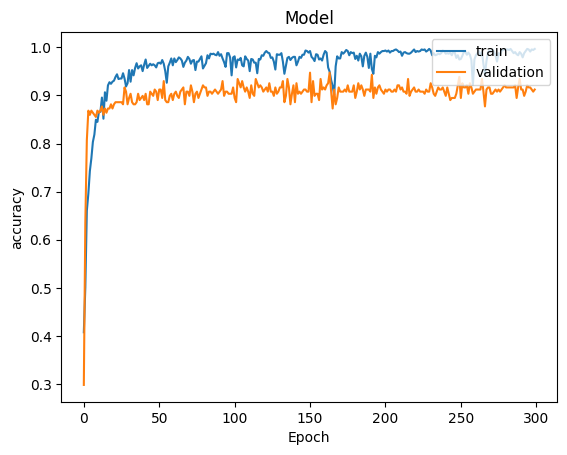

In [23]:
plot_metric(history)

In [24]:
# Plotting function for loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

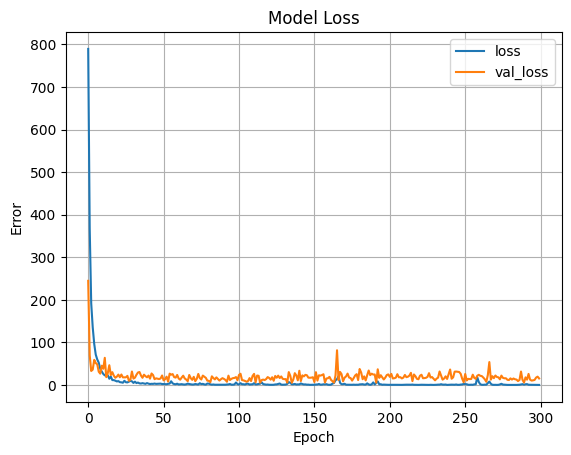

In [25]:
plot_loss(history)

In [30]:
y_train.head()

443      True
802      True
687     False
984     False
1132    False
Name: is_seizure, dtype: bool

In [47]:
y_pred.round()

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

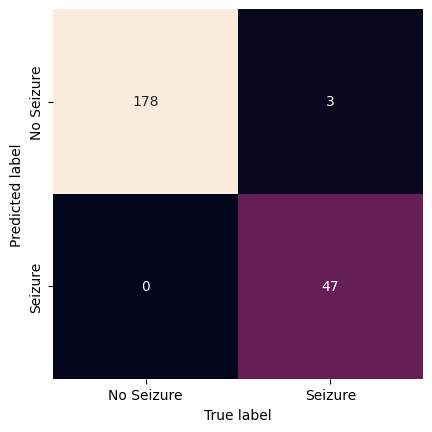

In [48]:
# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred.round())
labels = ['No Seizure', 'Seizure']
# Create the heatmap with custom labels
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()

In [50]:
  report = classification_report(y_test, y_pred.round())
  print("Classification Report:")
  print(report)
 

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       178
        True       1.00      0.94      0.97        50

    accuracy                           0.99       228
   macro avg       0.99      0.97      0.98       228
weighted avg       0.99      0.99      0.99       228

